<a href="https://colab.research.google.com/github/harpreet-kaur87/Machine_Learning/blob/main/Loan_approval_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Problem Statement:

In the field of banking, accurately predicting and approving loan applications is important for risk management and financial stability. A robust machine learning model for loan approval ensures efficient decision-making, mitigates potential losses, and fosters responsible lending practices, contributing to a healthier financial ecosystem for both the bank and its clients.

Problem:  The traditional loan approval process in the banking sector is often time-consuming and subjective. This project aims to develop a machine learning system that analyzes loan applications and predicts approval rates, facilitating faster and more data-driven decisions for loan officers.

Dataset : https://www.kaggle.com/datasets/architsharma01/loan-approval-prediction-dataset

In [77]:
# Importing the dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

# machine learning
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

In [78]:
df = pd.read_csv('/content/loan_approval_dataset.csv')

In [79]:
df.shape

(4269, 13)

In [80]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [81]:
df.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [82]:
df.columns = df.columns.str.replace(' ','')

In [83]:
df.columns

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

In [84]:
# statistical summary of data
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [85]:
#null values in dataframe
df.isnull().sum()

loan_id                     0
no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

In [86]:
# distribution of target feature
df.loan_status.value_counts()

 Approved    2656
 Rejected    1613
Name: loan_status, dtype: int64

<Axes: xlabel='loan_status', ylabel='count'>

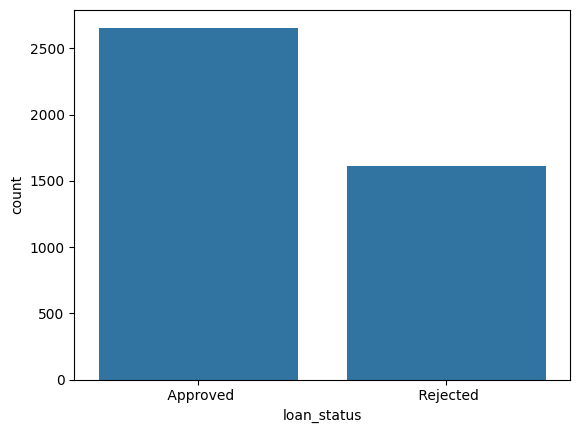

In [87]:
#distribution of target variable
sns.countplot(df, x='loan_status')

<Axes: xlabel='education', ylabel='count'>

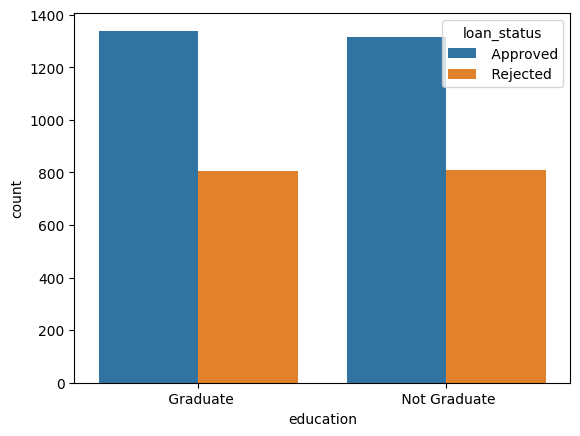

In [88]:
sns.countplot(df, x='education', hue='loan_status')

<Axes: xlabel='no_of_dependents', ylabel='count'>

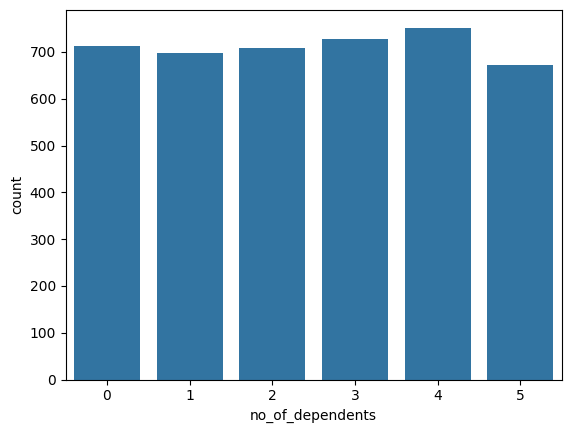

In [89]:
sns.countplot(df,x='no_of_dependents')

<Axes: xlabel='self_employed', ylabel='count'>

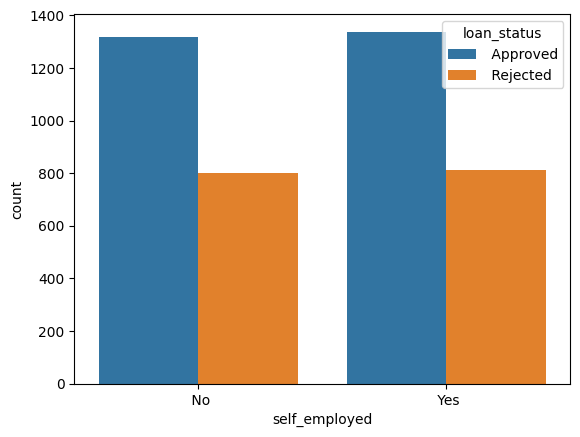

In [90]:
sns.countplot(df, x='self_employed', hue='loan_status')

<Axes: xlabel='income_annum', ylabel='Count'>

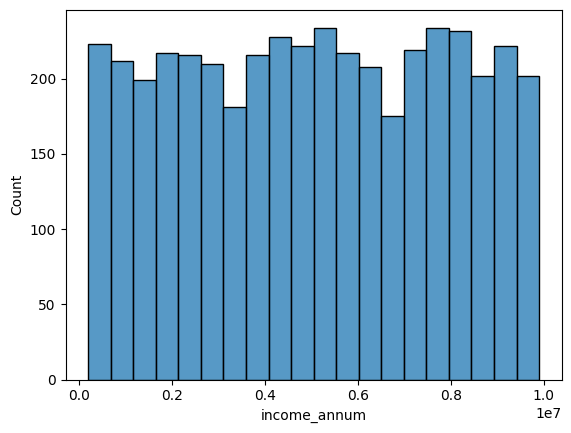

In [91]:
sns.histplot(df, x='income_annum', bins=20)

<Axes: xlabel='loan_amount', ylabel='Count'>

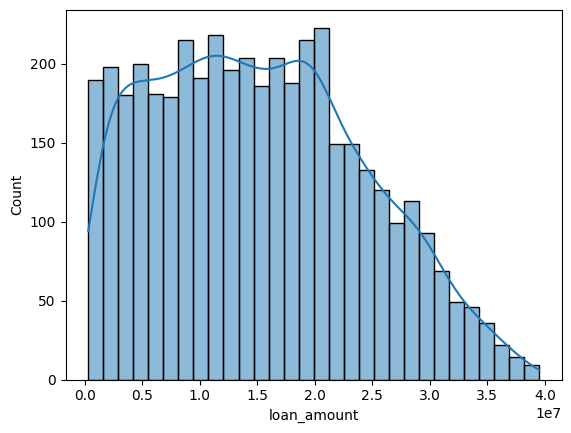

In [92]:
sns.histplot(df, x='loan_amount', bins=30, kde=True)

<Axes: xlabel='loan_term', ylabel='count'>

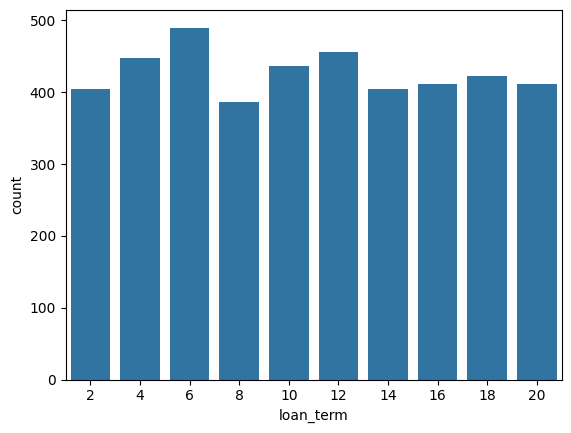

In [93]:
sns.countplot(df, x='loan_term')

<Axes: ylabel='residential_assets_value'>

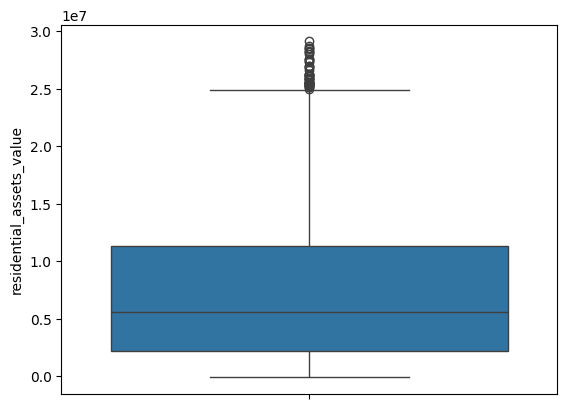

In [94]:
sns.boxplot(df['residential_assets_value'])

<Axes: ylabel='commercial_assets_value'>

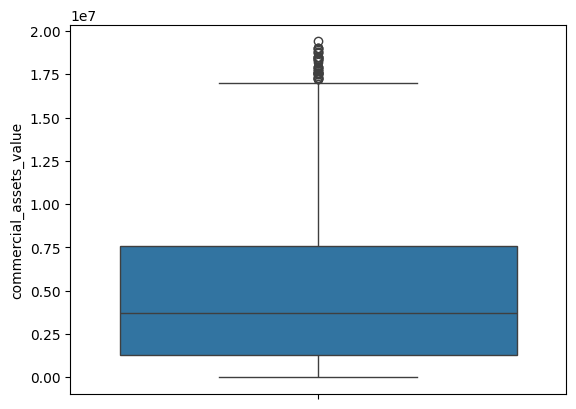

In [95]:
sns.boxplot(df['commercial_assets_value'])

<Axes: ylabel='bank_asset_value'>

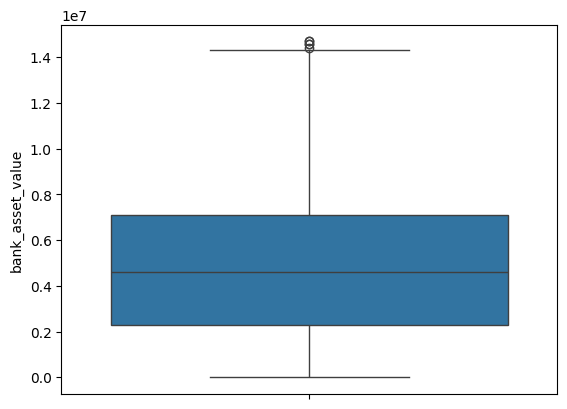

In [96]:
sns.boxplot(df['bank_asset_value'])

In [97]:
# removing outlier with iqr method

column = ['residential_assets_value','commercial_assets_value','bank_asset_value']

def remove_outlier(df,column):

  for col in column:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)

    iqr = q3 - q1

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
  return df

In [98]:
df = remove_outlier(df,column)

In [99]:
# length of dataframe after removing outliers
len(df)

4173

<Axes: >

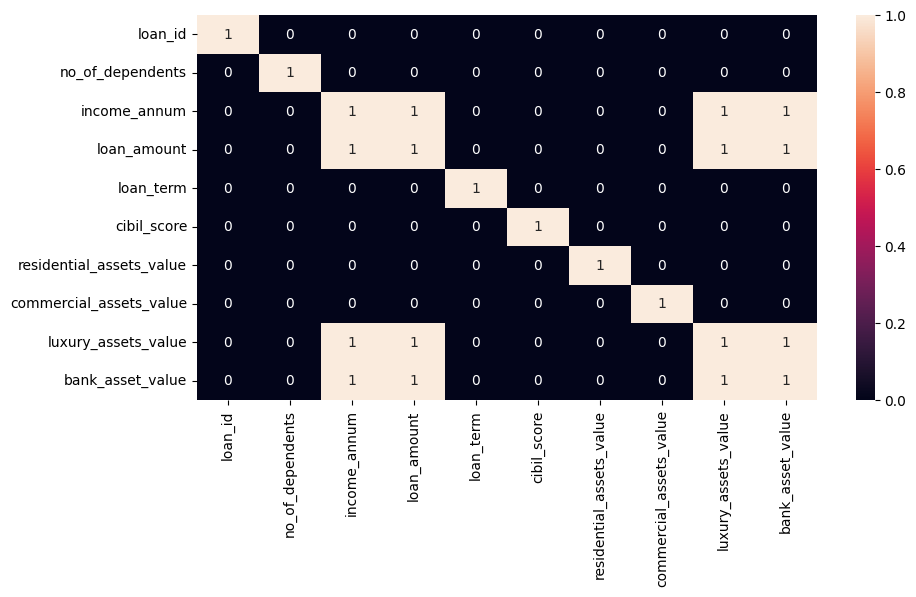

In [100]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr() > 0.7, annot=True)

#Machine Learning Model

In [101]:
import re
df['loan_status'] = df['loan_status'].str.replace(r"\s+", " ").str.strip()

In [102]:
df['loan_status'] = df['loan_status'].replace({'Approved': 1,'Rejected': 0})

In [103]:
df['education'] = df['education'].str.replace(' ','')

In [104]:
df['education'] = df['education'].replace({'Graduate': 1,'NotGraduate': 0})

In [105]:
df['self_employed'] = df['self_employed'].str.replace(' ','')

In [106]:
df['self_employed'] = df['self_employed'].replace({'Yes':1,'No':0})

In [107]:
x = df[['no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value']]
y = df['loan_status']

In [108]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [109]:
x.shape, x_train.shape, x_test.shape

((4173, 11), (3338, 11), (835, 11))

In [110]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

x_train = scalar.fit_transform(x_train)
x_test = scalar.transform(x_test)

In [111]:
lr =  LogisticRegression()
rfc =  RandomForestClassifier()
dt =  DecisionTreeClassifier()
gbc =  GradientBoostingClassifier()
sv = SVC()


for model in (lr,rfc,dt,gbc,sv):
  model.fit(x_train,y_train)
  y_pred = model.predict(x_test)
  accuracy_on_test_data = accuracy_score(y_test,y_pred)
  print(f'{model} --> {accuracy_on_test_data}')
  print()
  print(classification_report(y_test,y_pred))
  print()
  print(confusion_matrix(y_test,y_pred))
  print('-'*80)

LogisticRegression() --> 0.9065868263473054

              precision    recall  f1-score   support

           0       0.90      0.87      0.88       337
           1       0.91      0.93      0.92       498

    accuracy                           0.91       835
   macro avg       0.90      0.90      0.90       835
weighted avg       0.91      0.91      0.91       835


[[293  44]
 [ 34 464]]
--------------------------------------------------------------------------------
RandomForestClassifier() --> 0.9784431137724551

              precision    recall  f1-score   support

           0       0.99      0.96      0.97       337
           1       0.97      0.99      0.98       498

    accuracy                           0.98       835
   macro avg       0.98      0.97      0.98       835
weighted avg       0.98      0.98      0.98       835


[[322  15]
 [  3 495]]
--------------------------------------------------------------------------------
DecisionTreeClassifier() --> 0.97485029940

In [112]:
# feature importance with random forest

rfc.fit(x_train,y_train)

importance_rfc = rfc.feature_importances_

feature_names = ['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value']


for feature,importance in zip(feature_names,importance_rfc):
  print(f'{feature}:---> {importance}')

loan_id:---> 0.007755496269105835
no_of_dependents:---> 0.0024594479422656197
education:---> 0.002655528863057442
self_employed:---> 0.01823700269696675
income_annum:---> 0.028786476955444118
loan_amount:---> 0.061709456776317895
loan_term:---> 0.8122389104273443
cibil_score:---> 0.016953436242570875
residential_assets_value:---> 0.014859787384111199
commercial_assets_value:---> 0.018874092568229778
luxury_assets_value:---> 0.015470363874586153


Text(0.5, 1.0, 'Feature Importance - Random Forest Classifier')

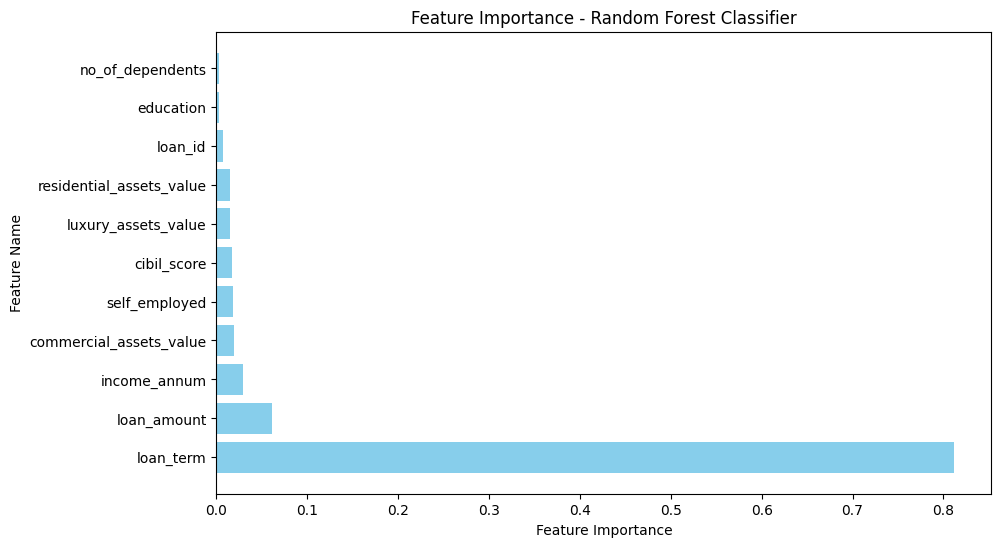

In [113]:
sorted_idx = importance_rfc.argsort()[::-1]
sorted_features = [feature_names[i] for i in sorted_idx]
sorted_importances = importance_rfc[sorted_idx]

plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_importances, color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Feature Name")
plt.title("Feature Importance - Random Forest Classifier")

In [114]:
rfc.fit(x_train,y_train)
y_prd = rfc.predict(x_test)
accuracy_with_rfc = accuracy_score(y_test,y_prd)
print(f'{rfc} ---> {accuracy_with_rfc}')
print(confusion_matrix(y_test,y_prd))

RandomForestClassifier() ---> 0.9760479041916168
[[319  18]
 [  2 496]]


In [115]:
# feature importance with decision tree

dt.fit(x_train,y_train)

importance_dt = dt.feature_importances_

feature_names = ['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value']


for feature,importance in zip(feature_names,importance_dt):
  print(f'{feature}:---> {importance}')

loan_id:---> 0.0036915532874292564
no_of_dependents:---> 0.0006421856320487952
education:---> 0.0
self_employed:---> 0.020037409733339923
income_annum:---> 0.03708074190297115
loan_amount:---> 0.08513497318725452
loan_term:---> 0.8243668046734485
cibil_score:---> 0.0037570186196558544
residential_assets_value:---> 0.005166013079924248
commercial_assets_value:---> 0.010757321926788821
luxury_assets_value:---> 0.009365977957139133


Text(0.5, 1.0, 'Feature Importance - Extra Trees Classifier')

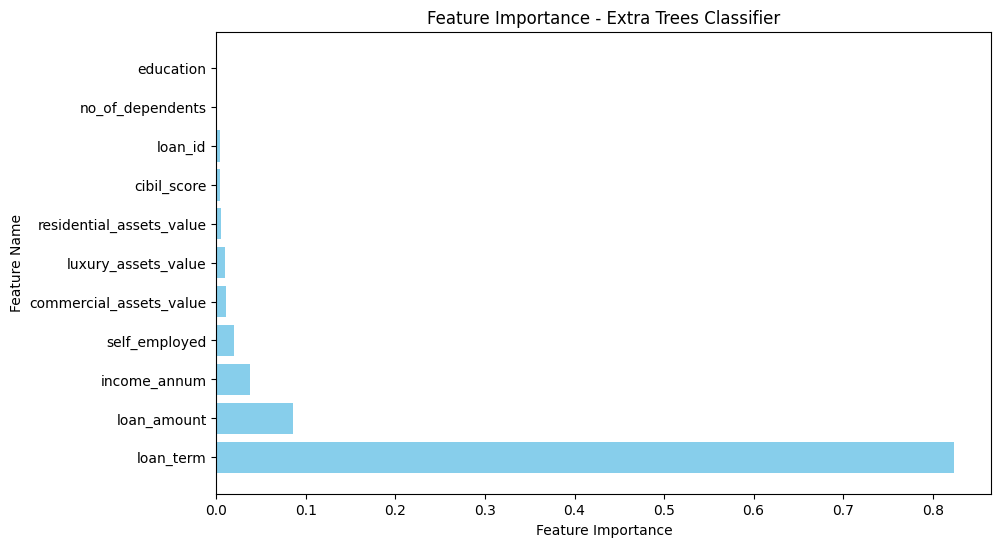

In [116]:
sorted_idx = importance_dt.argsort()[::-1]
sorted_features = [feature_names[i] for i in sorted_idx]
sorted_importances = importance_dt[sorted_idx]

plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_importances, color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Feature Name")
plt.title("Feature Importance - Extra Trees Classifier")

In [117]:
dt.fit(x_train,y_train)
y_prd = dt.predict(x_test)
accuracy_with_dt = accuracy_score(y_test,y_prd)
print(f'{dt} ---> {accuracy_with_dt}')
print(confusion_matrix(y_test,y_prd))

DecisionTreeClassifier() ---> 0.9724550898203593
[[320  17]
 [  6 492]]


In [118]:
gbc.fit(x_train,y_train)

importance_gbc = gbc.feature_importances_

feature_names = ['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value']


for feature,importance in zip(feature_names,importance_gbc):
  print(f'{feature}:---> {importance}')

loan_id:---> 0.0009058039954685868
no_of_dependents:---> 4.933292469349295e-05
education:---> 6.87174843572996e-05
self_employed:---> 0.009949710544560567
income_annum:---> 0.01928015140783714
loan_amount:---> 0.09742201642810144
loan_term:---> 0.8649035117751651
cibil_score:---> 0.002183191427332285
residential_assets_value:---> 0.0013390489237838383
commercial_assets_value:---> 0.0015997007302799026
luxury_assets_value:---> 0.002298814358420311


Text(0.5, 1.0, 'Feature Importance - Gradient Boosting Classifier')

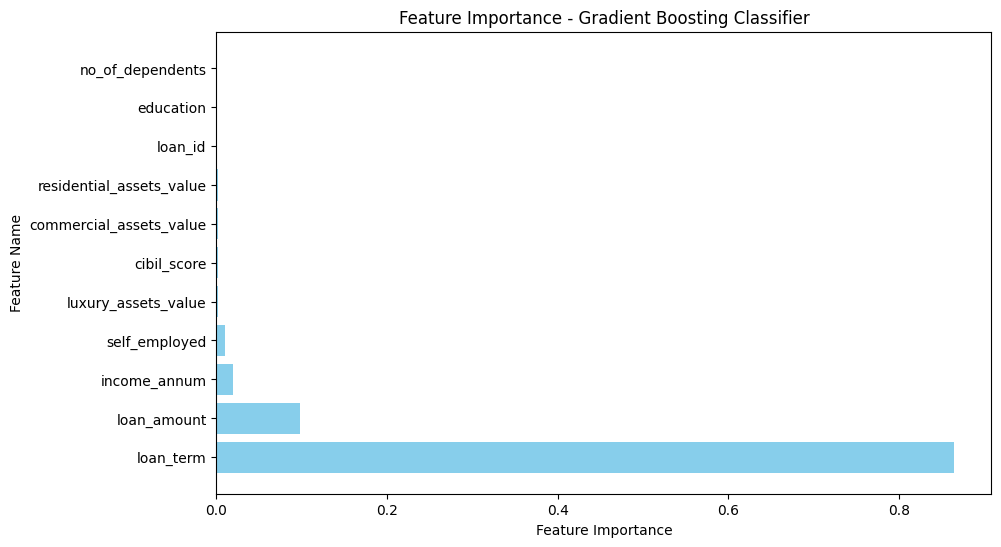

In [119]:
sorted_idx = importance_gbc.argsort()[::-1]
sorted_features = [feature_names[i] for i in sorted_idx]
sorted_importances = importance_gbc[sorted_idx]

plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_importances, color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Feature Name")
plt.title("Feature Importance - Gradient Boosting Classifier")

###Model Building after dropping the highly correlated features

In [120]:
# Accuracy after dropping the highly correlated features

x = df[['no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       ]]
y = df['loan_status']

In [121]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [122]:
x.shape, x_train.shape, x_test.shape

((4173, 8), (3338, 8), (835, 8))

In [123]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

x_train = scalar.fit_transform(x_train)
x_test = scalar.transform(x_test)

In [124]:
for model in (lr,rfc,dt,gbc,sv):
  model.fit(x_train,y_train)
  y_pred = model.predict(x_test)
  accuracy_on_test_data = accuracy_score(y_test,y_pred)
  print(f'{model} --> {accuracy_on_test_data}')
  print()
  print(classification_report(y_test,y_pred))
  print()
  print(confusion_matrix(y_test,y_pred))
  print('*'*80)

LogisticRegression() --> 0.9161676646706587

              precision    recall  f1-score   support

           0       0.90      0.89      0.89       326
           1       0.93      0.94      0.93       509

    accuracy                           0.92       835
   macro avg       0.91      0.91      0.91       835
weighted avg       0.92      0.92      0.92       835


[[289  37]
 [ 33 476]]
********************************************************************************
RandomForestClassifier() --> 0.9748502994011976

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       326
           1       0.98      0.98      0.98       509

    accuracy                           0.97       835
   macro avg       0.97      0.97      0.97       835
weighted avg       0.97      0.97      0.97       835


[[317   9]
 [ 12 497]]
********************************************************************************
DecisionTreeClassifier() --> 0.96766467065

#Conclusion :

1. Developed loan application approval prediction system using random forest, support vector machine (SVM), logistic regression, and decision tree models implemented in Python with libraries like pandas, scikit-learn, and matplotlib.
2. Random forest and Decision Tree classifier achieved the highest accuracy of 98%.
3. Analysis of feature importance revealed that loan_term is the most influential factor in predicting loan application approval according to the Random Forest, Decision Tree, and Gradient Boosting Classifier models.
4. By leveraging machine learning for loan prediction approval analysis, this project showcases how the banking sector can improve its efficiency by automating loan assessment processes.